In [95]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *  #QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit_textbook.tools import random_state
from qiskit.extensions import Initialize

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-01-06 21:18:52,678: Credentials are already in use. The existing account in the session will be replaced.


In [96]:
qr= QuantumRegister(3, name="q")  #3qubits
crz= ClassicalRegister(1, name="crz")  #2 claassical bits in two different registers
crx= ClassicalRegister(1, name="crx")
teleportation_circuit= QuantumCircuit(qr, crz, crx)
#teleportation_circuit.draw()

In [97]:
def create_bell_pair(qc, a, b): #creates a bell pair in qc using qubit a and b
    qc.h(a)
    qc.cx(a,b)

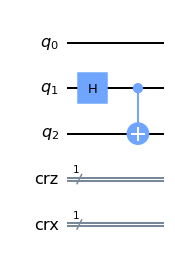

In [98]:
#step 1
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw()

In [99]:
#let say Alice owns q1 and Bob ows q2 after they part ways.
def Alice_measurement_state(qc, psi, a):
    qc.cx(psi,a)
    qc.h(psi)

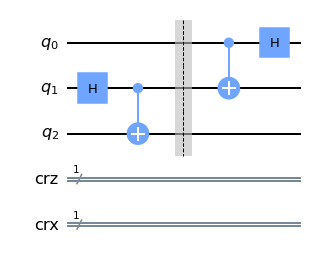

In [100]:
# step 2
teleportation_circuit.barrier()
Alice_measurement_state(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

In [101]:
def measure_and_send(qc, a, b):  #measure qubits a,b and "send" to bob
    qc.measure(a,0)
    qc.measure(b,1)

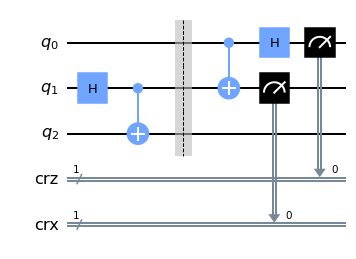

In [102]:
# step 3
qc.barrier()
measure_and_send(teleportation_circuit,0,1)
teleportation_circuit.draw()

In [103]:
def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx,1)  #we use c_if to control gate with classical bits instead of qubit
    qc.z(qubit).c_if(crz,1)  # apply X,Z gates only if classical registers are in state 1

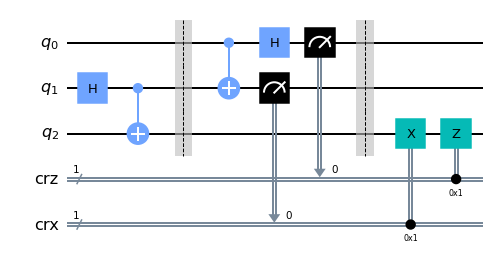

In [104]:
# Step 4
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw() #complete Q-Teleportation circuit

<IPython.core.display.Latex object>

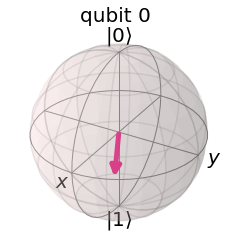

In [105]:
# Test the circuit protocol
psi= random_state(1) # creating random 1-qubit entanglement bell state
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi)

In [107]:
init_gate= Initialize(psi)
init_gate.label= "init"



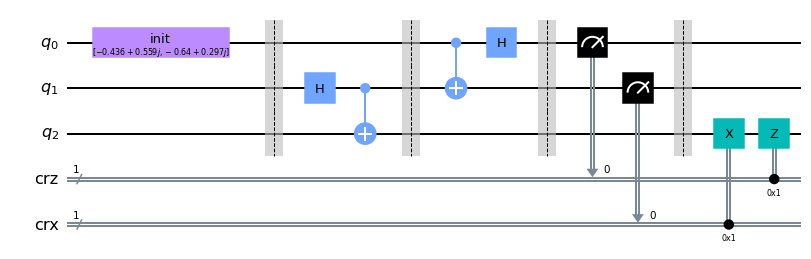

In [108]:
# Overall teleportation setup 

qr= QuantumRegister(3, name="q")  
crz= ClassicalRegister(1, name="crz")
crx= ClassicalRegister(1, name="crx")
qc= QuantumCircuit(qr, crz, crx)

#Step 0: 1st initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

#Step1 create entangled bell state btw alice and bob
create_bell_pair(qc, 1, 2)
qc.barrier()

#Step2 measurement state
Alice_measurement_state(qc, 0, 1)
qc.barrier()

#Step3  alice sends the classical bits to bob
measure_and_send(qc, 0, 1)
qc.barrier()

#Step4 bob decoded qubits
bob_gates(qc, 2, crz, crx)

qc.draw()




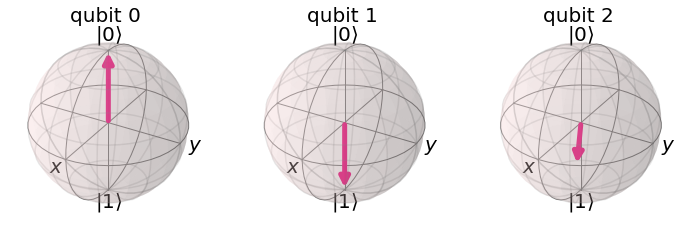

In [109]:
sim= Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector=sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)
